# Truncated Distribution Generator

Generate samples from common distributions truncated with lower and upper bounds

[Overleaf paper](https://www.overleaf.com/6325975793zxxhznfsvcgc)

[PyRo](https://pyro.ai/)

VI with 
- Mean Field
- Stein Method

Generate TD for 
- Gaussian 
- Student (T)

In [1]:
%%capture
!pip install qmcpy --quiet
from qmcpy import *
from numpy import *
from scipy import stats
from matplotlib import pyplot
# plot fonts sizes
pyplot.rc('font', size=16)
pyplot.rc('axes', titlesize=16, labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

In [2]:
def scat_plot(x,ax,xlim,ylim,s,color,title):
    ax.scatter(x[:,0],x[:,1],s=s,color=color)
    ax.set_xlim(xlim);ax.set_xticks(xlim);ax.set_xlabel('$x_{i,1}$')
    ax.set_ylim(ylim);ax.set_yticks(ylim);ax.set_ylabel('$x_{i,2}$')
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    ax.set_title(title)

In [3]:
def trunc_gen(x_stdu, lb, ub, distrib, independent=True, **params):
    """
    Transform samples mimicking a standard uniform to mimic a truncated distribution
    
    Args:
        x_stdu (numpy.ndarray): n samples x d dimensional array of samples
        lb (numpy.ndarray): length d lower bound vector
        ub (numpy.ndarray): length d upper bound vector
        distrib (scipy.stats module): a distribution from scipy.stats (i.e.norm,t) 
            that has `cdf` and `ppf` (inverse cdf) functions
        independent (bool): sample dimensions are independent? 
        **params (dict): keyword arguments (parameters) to pass to into `distrib.cdf` and `distrib.ppf`
            
    Return:
        numpy.ndarray: n samples by d dimension array of samples mimicking the truncated distribution
    """
    cdf = distrib.cdf
    invcdf = distrib.ppf
    if independent:
        x_trunc = zeros(x_stdu.shape,dtype=double)
        for j in range(x_trunc.shape[1]):
            params_j = {param:val[j] for param,val in params.items()}
            cdflb = cdf(lb[j],**params_j)
            cdfub = cdf(ub[j],**params_j)
            x_trunc[:,j] = invcdf((cdfub-cdflb)*x_stdu[:,j]+cdflb,**params_j)
        return x_trunc
    else:
        msg = '''
        `trunc_gen` currenly only supports generating samples from 
        distributions with independent dimensions.
        '''
        raise Exception(msg)
        return -1

In [4]:
d = 2
n = 2**8

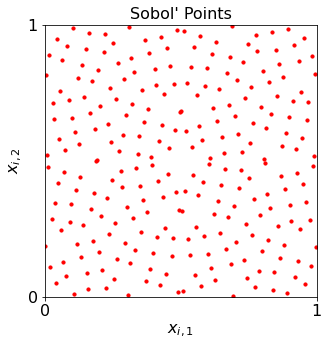

In [5]:
s = Sobol(d,seed=7)
u = s.gen_samples(n)
fig,ax = pyplot.subplots(nrows=1,ncols=1,figsize=(5,5))
scat_plot(u,ax,[0,1],[0,1],s=10,color='r',title="Sobol' Points")

### Generating from Guassian and Student with $\mu=0$ and $\Sigma=1$

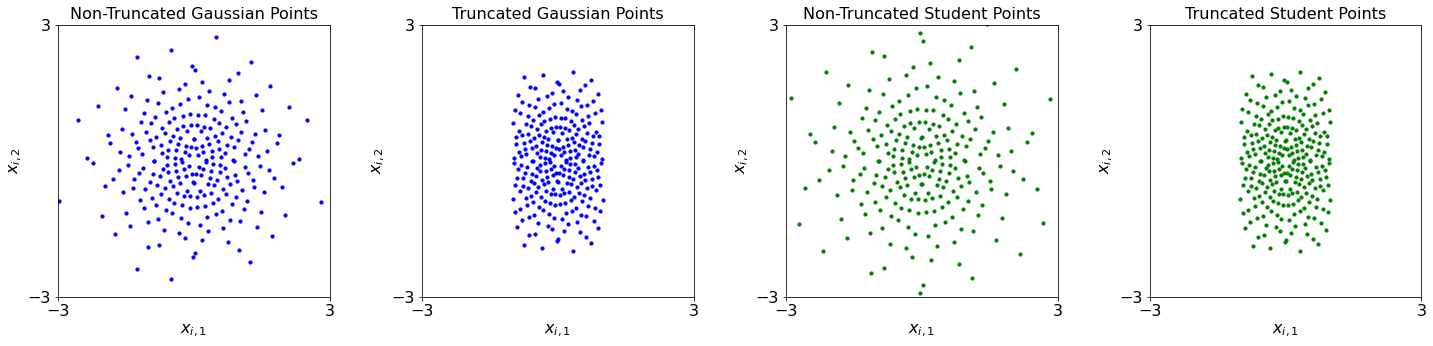

In [6]:
# parameters
trunc_lb = array([-1,-2])
trunc_ub = array([1,2])
# points
g = trunc_gen(u,tile(-inf,d),tile(inf,d),stats.norm)
gt = trunc_gen(u,trunc_lb,trunc_ub,stats.norm)
t = trunc_gen(u,tile(-inf,d),tile(inf,d),stats.t,df=tile(5,d))
tt = trunc_gen(u,trunc_lb,trunc_ub,stats.t,df=tile(5,d))
# plots
fig,ax = pyplot.subplots(nrows=1,ncols=4,figsize=(25,5))
scat_plot(g,ax[0],[-3,3],[-3,3],s=10,color='b',title="Non-Truncated Gaussian Points")
scat_plot(gt,ax[1],[-3,3],[-3,3],s=10,color='b',title="Truncated Gaussian Points")
scat_plot(t,ax[2],[-3,3],[-3,3],s=10,color='g',title="Non-Truncated Student Points")
scat_plot(tt,ax[3],[-3,3],[-3,3],s=10,color='g',title="Truncated Student Points")

### Generating from Gaussian and Student with $\mu=[1,2]$ and $\Sigma=\text{Diag}([1,16])$

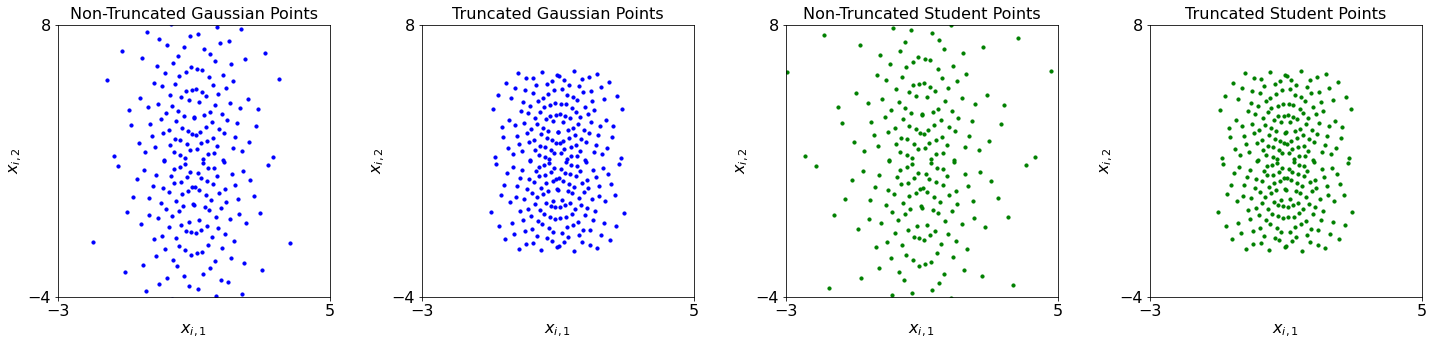

In [7]:
# parameters
mu = array([1,2])
std = sqrt(array([1,16]))
trunc_lb = [-1,-2]
trunc_ub = [3,6]
# points
g = trunc_gen(u,tile(-inf,d),tile(inf,d),stats.norm,loc=mu,scale=std)
gt = trunc_gen(u,trunc_lb,trunc_ub,stats.norm,loc=mu,scale=std)
t = trunc_gen(u,tile(-inf,d),tile(inf,d),stats.t,df=tile(5,d),loc=mu,scale=std)
tt = trunc_gen(u,trunc_lb,trunc_ub,stats.t,df=tile(5,d),loc=mu,scale=std)
# plots
fig,ax = pyplot.subplots(nrows=1,ncols=4,figsize=(25,5))
scat_plot(g,ax[0],[-3,5],[-4,8],s=10,color='b',title="Non-Truncated Gaussian Points")
scat_plot(gt,ax[1],[-3,5],[-4,8],s=10,color='b',title="Truncated Gaussian Points")
scat_plot(t,ax[2],[-3,5],[-4,8],s=10,color='g',title="Non-Truncated Student Points")
scat_plot(tt,ax[3],[-3,5],[-4,8],s=10,color='g',title="Truncated Student Points")